<a href="https://colab.research.google.com/github/SrvPioneer/Airbnb_Data_Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

![Airbnb](https://sm.pcmag.com/pcmag_in/news/a/airbnb-is-/airbnb-is-attempting-to-stop-disruptive-new-years-eve-partie_w6va.jpg)

In [6]:
import numpy as num
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
#import data into colab notebook
df_airbnb = pd.read_csv("/content/drive/MyDrive/Capstone Project - EDA/Airbnb NYC 2019.csv")
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
#read all columns into Airbnb dataset
df_airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [10]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [11]:
df_airbnb.shape

(48895, 16)

In [12]:
df_airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [13]:
df_airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#Taking useful columns only


In [14]:
selected_columns = ["id", "name", "host_id", "host_name", "neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights", "number_of_reviews", "calculated_host_listings_count", "availability_365"]

In [15]:
new_airbnb_df = df_airbnb[selected_columns]
new_airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


#What can we learn about different hosts and areas?

In [16]:
host_areas  = new_airbnb_df.groupby(["host_name", "neighbourhood_group"])["calculated_host_listings_count"].count().reset_index()
top_most_host_areas = host_areas.sort_values(by = "calculated_host_listings_count", ascending = False).head()

In [17]:
top_most_host_areas

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,327
1834,Blueground,Manhattan,230
9742,Michael,Manhattan,212
3250,David,Manhattan,202
9741,Michael,Brooklyn,159


#Display the final output through data visualization

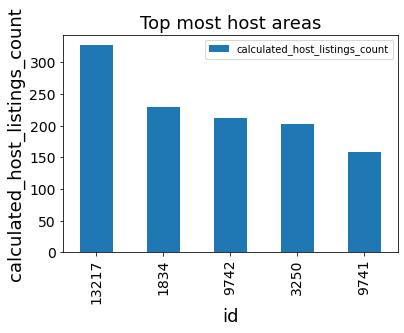

In [18]:
top_most_host_areas.plot.bar(fontsize = 14)
plt.title('Top most host areas', fontsize = 18)
plt.ylabel("calculated_host_listings_count", fontsize = 18)
plt.xlabel("id", fontsize = 18)
plt.rcParams['figure.figsize'] = (10, 5)

# As we can see that most number of host listings are from <b>Manhattan</b> created by <b>Sonder (NYC), Blueground, Michael, David.

#What can we learn from predictions? (ex: locations, prices, reviews, etc)

In [43]:
areas_reviews = new_airbnb_df.groupby(["name", "neighbourhood_group", "room_type", "price", "minimum_nights",])["number_of_reviews"].count().reset_index()
sorted_areas_reviews = areas_reviews.sort_values(by = "price", ascending = False).head(150)
sorted_areas_reviews

,name,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews
1112,1-BR Lincoln Center,Manhattan,Entire home/apt,10000,30,1
20220,Furnished room in Astoria apartment,Queens,Private room,10000,100,1
27225,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,Entire home/apt,10000,5,1
41048,Spanish Harlem Apt,Manhattan,Entire home/apt,9999,5,1
36155,"Quiet, Clean, Lit @ LES & Chinatown",Manhattan,Private room,9999,99,1
...,...,...,...,...,...,...
28307,"Manhattan, double size sofa bed no deposit",Manhattan,Private room,1500,5,1
28456,Master Garden Suite @ Northern Lights Mansion,Manhattan,Private room,1500,2,1
19785,Flatiron Oasis Off 5th Ave,Manhattan,Entire home/apt,1500,3,1
18545,East Village Townhouse,Manhattan,Entire home/apt,1500,30,1


Text(0.5, 1.0, 'Price comparison with respect to area')

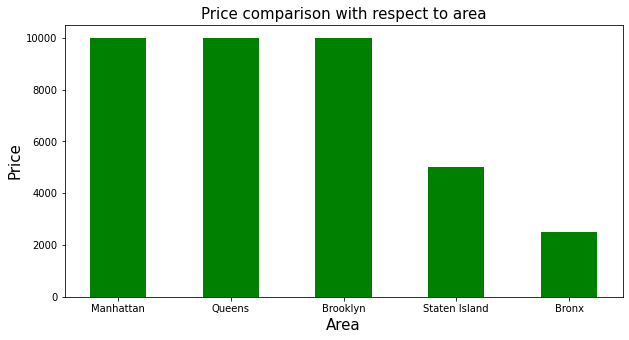

In [44]:
#Data visualization with respect to price using bar plot
area = sorted_areas_reviews["neighbourhood_group"]
price = sorted_areas_reviews["price"]
figure = plt.figure(figsize = (10, 5))
plt.bar(area, price, color = "green",width = 0.5)
plt.xlabel("Area", fontsize = 15)
plt.ylabel("Price", fontsize = 15)
plt.title("Price comparison with respect to area", fontsize = 15)

#

In [45]:
price_reviews = areas_reviews.sort_values(by = "number_of_reviews", ascending = False).head(150)
price_reviews

,name,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews
22524,Hillside Hotel,Queens,Private room,135,1,12
26248,Loft Suite @ The Box House Hotel,Brooklyn,Entire home/apt,199,3,11
4619,Artsy Private BR in Fort Greene Cumberland,Brooklyn,Private room,48,30,10
23573,IN MINT CONDITION-STUDIOS EAST 44TH/UNITED NAT...,Manhattan,Entire home/apt,175,30,5
22525,Hillside Hotel,Queens,Private room,165,1,5
...,...,...,...,...,...,...
32499,Perfect Place to just Sleep while you explore NYC,Manhattan,Private room,84,2,1
32500,Perfect Place to stay in Manhattan,Manhattan,Private room,65,4,1
32466,Perfect Location - Meticulously Kept Flat,Brooklyn,Entire home/apt,220,5,1
32711,Pleasant-Place JFK Private Housings Complex,Queens,Private room,73,1,1


Text(0.5, 1.0, 'Review comparison with reapect to area')

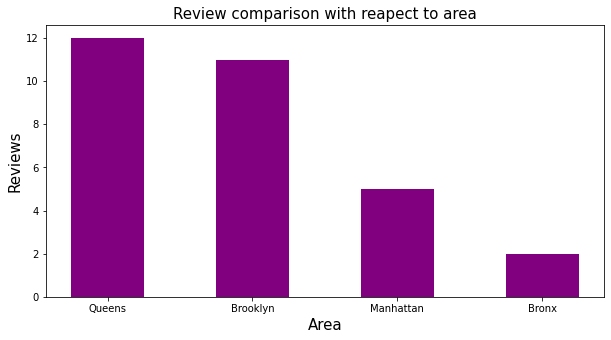

In [56]:
#Plot a bar chart with respect to reviews
area = price_reviews["neighbourhood_group"]
reviews = price_reviews["number_of_reviews"]
figure = plt.figure(figsize = (10, 5))
plt.bar(area, reviews, color = "purple", width = 0.5)
plt.xlabel("Area", fontsize = 15)
plt.ylabel("Reviews", fontsize = 15)
plt.title("Review comparison with reapect to area", fontsize = 15)

# From above analysis we can say that most people perfer to stay on those hotel where price is less.

#Which hosts are the busiest and why?

In [58]:
busiest_hosts = new_airbnb_df.groupby(["host_name", "neighbourhood_group"])["minimum_nights"].count().reset_index()
busiest_hosts = busiest_hosts.sort_values(by = "minimum_nights", ascending = False).head()
busiest_hosts

,host_name,neighbourhood_group,minimum_nights
13217,Sonder (NYC),Manhattan,327
1834,Blueground,Manhattan,230
9742,Michael,Manhattan,212
3250,David,Manhattan,202
9741,Michael,Brooklyn,159


Text(0.5, 1.0, 'Host name VS Host night counts')

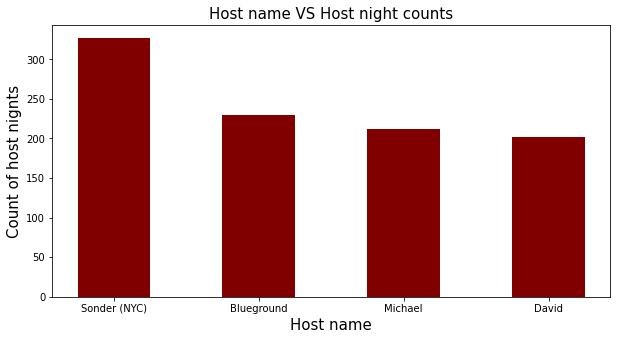

In [62]:
#Plot a bar chart to get the busiest hosts
host_names = busiest_hosts["host_name"]
host_nights = busiest_hosts["minimum_nights"]
figure = plt.figure(figsize= (10, 5))
plt.bar(host_names, host_nights, color = "maroon", width = 0.5)
plt.xlabel("Host name", fontsize = 15)
plt.ylabel("Count of host nignts", fontsize = 15)
plt.title("Host name VS Host night counts", fontsize = 15)

#This above analysis help to understant about busiest hosts.

#Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [64]:
traffic_areas = new_airbnb_df.groupby(["neighbourhood_group", "room_type"])["minimum_nights"].count().reset_index()
traffic_areas = traffic_areas.sort_values(by = "minimum_nights", ascending = False).head(15)
traffic_areas

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


Text(0.5, 1.0, 'Room Type VS Stayed Nights')

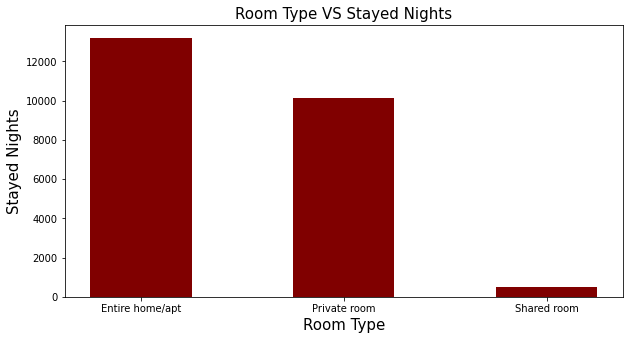

In [67]:
#Plot a bar chart to show traffic areas
room_type = traffic_areas["room_type"]
stayed_nights = traffic_areas["minimum_nights"]
figure = plt.figure(figsize= (10, 5))
plt.bar(room_type, stayed_nights, color = "maroon", width = 0.5)
plt.xlabel("Room Type", fontsize = 15)
plt.ylabel("Stayed Nights", fontsize = 15)
plt.title("Room Type VS Stayed Nights", fontsize = 15)

Text(0.5, 1.0, 'Area VS Stayed Nights')

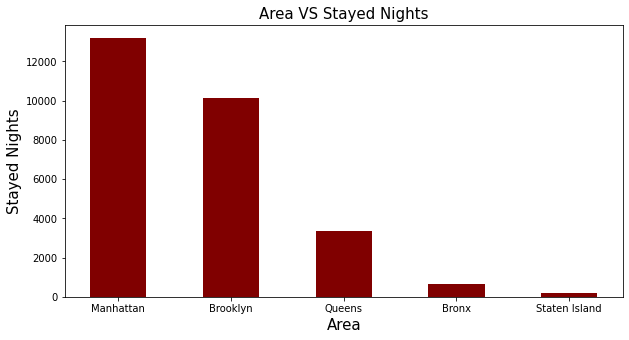

In [73]:
stayed_nights = traffic_areas["minimum_nights"]
area = traffic_areas["neighbourhood_group"]
figure = plt.figure(figsize= (10, 5))
plt.bar(area, stayed_nights, color = "maroon", width = 0.5)
plt.xlabel("Area", fontsize = 15)
plt.ylabel("Stayed Nights", fontsize = 15)
plt.title("Area VS Stayed Nights", fontsize = 15)

#Above this analysis report make an understanding that most peoples are perferring to stay <u>Entire home/apt and Private room</u> which are present in <u>Manhattan, Brooklyn, Manhattan </u>.